In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data() # load data

x_train = x_train.astype('float32') / 255. # normalize x_train
x_test = x_test.astype('float32') / 255.   # normalize x_test 
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


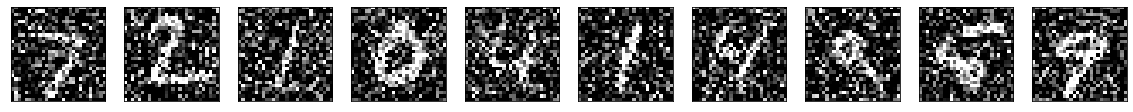

In [2]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [3]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28,28,1)) # adapt this if using channels first image data format

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# at this point the representation is (7,7,32)
x = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 19s 321us/step - loss: 0.1792 - val_loss: 0.1211
Epoch 2/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1191 - val_loss: 0.1124
Epoch 3/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1116 - val_loss: 0.1076
Epoch 4/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1079 - val_loss: 0.1067
Epoch 5/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1055 - val_loss: 0.1036
Epoch 6/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1042 - val_loss: 0.1030
Epoch 7/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1030 - val_loss: 0.1008
Epoch 8/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1021 - val_loss: 0.1018
Epoch 9/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1015 - val

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

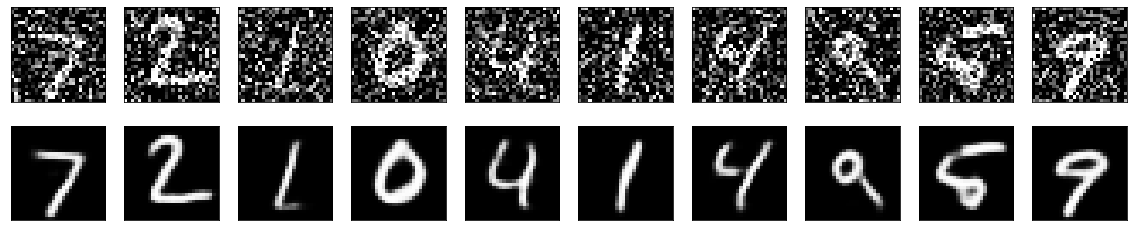

In [13]:
# use matplotlib 
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()